

> # Salários Profissionais de Data Science 2023



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

pd.set_option('display.max_rows', 10000)
df = pd.read_csv("ds_salaries.csv")
#teste
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [20]:
df.describe(include="all")

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,3755.000000,3755,3755,3755,3.755000e+03,3755,3755.000000,3755,3755.000000,3755,3755
unique,NaN,4,4,93,NaN,20,NaN,78,NaN,72,3
top,NaN,SE,FT,Data Engineer,NaN,USD,NaN,US,NaN,US,M
freq,NaN,2516,3718,1040,NaN,3224,NaN,3004,NaN,3040,3153
mean,2022.373635,NaN,NaN,NaN,1.906956e+05,NaN,137570.389880,NaN,46.271638,NaN,NaN
std,0.691448,NaN,NaN,NaN,6.716765e+05,NaN,63055.625278,NaN,48.589050,NaN,NaN
min,2020.000000,NaN,NaN,NaN,6.000000e+03,NaN,5132.000000,NaN,0.000000,NaN,NaN
25%,2022.000000,NaN,NaN,NaN,1.000000e+05,NaN,95000.000000,NaN,0.000000,NaN,NaN
50%,2022.000000,NaN,NaN,NaN,1.380000e+05,NaN,135000.000000,NaN,0.000000,NaN,NaN
75%,2023.000000,NaN,NaN,NaN,1.800000e+05,NaN,175000.000000,NaN,100.000000,NaN,NaN


In [21]:
len(df)

3755

In [22]:
df.dtypes

,0
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64
company_location,object


In [23]:
df.duplicated().sum()

np.int64(1171)

In [24]:
df = df.drop('salary', axis=1)
df.head(50)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,USD,147100,US,0,US,M


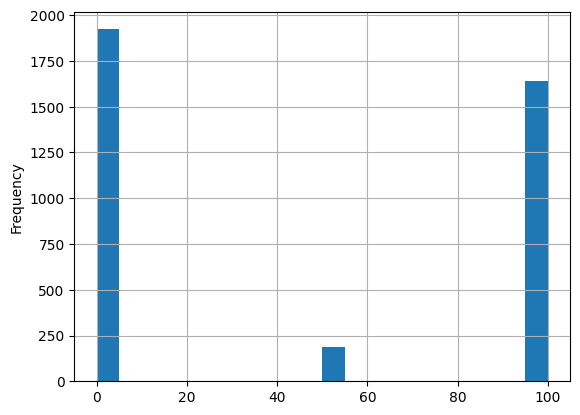

In [25]:
hist =  df.remote_ratio.plot.hist(bins=20)
plt.grid()

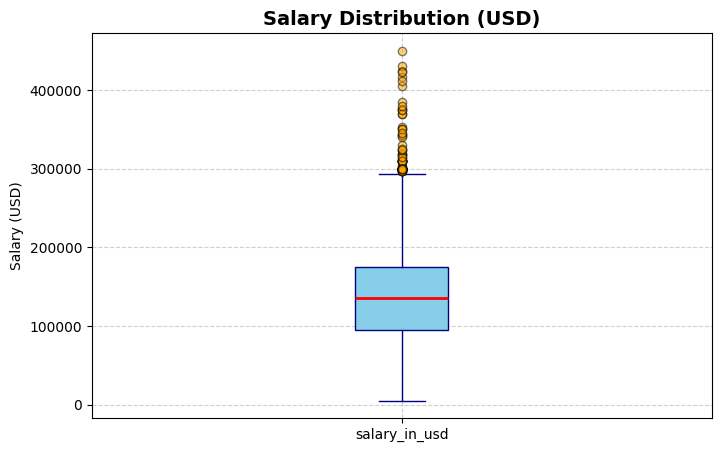

Primeiro quartil:  95000.0
Segundo quartil:  135000.0
Terceiro quartil:  175000.0
Limite superior :  295000.0
Limite inferior :  -25000.0


In [26]:
plt.figure(figsize=(8, 5))
box = df.boxplot(column='salary_in_usd', patch_artist=True, boxprops=dict(facecolor='skyblue', color='navy'),
                 medianprops=dict(color='red', linewidth=2),
                 whiskerprops=dict(color='navy'),
                 capprops=dict(color='navy'),
                 flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, alpha=0.5))

plt.title('Salary Distribution (USD)', fontsize=14, fontweight='bold')
plt.ylabel('Salary (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

q1 = df['salary_in_usd'].quantile(.25)
q2 = df['salary_in_usd'].quantile(.50)
q3 = df['salary_in_usd'].quantile(.75)

print("Primeiro quartil: ", q1)
print("Segundo quartil: ", q2)
print("Terceiro quartil: ", q3)

iqr = q3 - q1

superior = q3 + 1.5 * iqr
inferior = q1 - 1.5 * iqr

print("Limite superior : ", superior)
print("Limite inferior : ", inferior)


Df tem o seguinte numero de outliers:  63


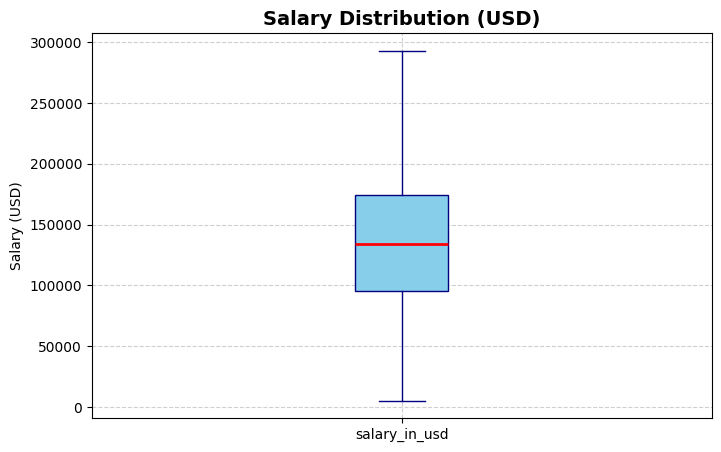

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
33,2023,SE,FT,Computer Vision Engineer,USD,342810,US,0,US,M
68,2023,SE,FT,Applied Scientist,USD,309400,US,0,US,L
83,2022,EN,FT,AI Developer,USD,300000,IN,50,IN,L
133,2023,SE,FT,Machine Learning Engineer,USD,342300,US,0,US,L
145,2023,SE,FT,Machine Learning Engineer,USD,318300,US,100,US,M


,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M


63


In [27]:
dfSemOutlier = df.loc[df['salary_in_usd'] <= superior]
print("Df tem o seguinte numero de outliers: ",len(df)-len(dfSemOutlier))
plt.figure(figsize=(8, 5))
box = dfSemOutlier.boxplot(column='salary_in_usd', patch_artist=True, boxprops=dict(facecolor='skyblue', color='navy'),
                 medianprops=dict(color='red', linewidth=2),
                 whiskerprops=dict(color='navy'),
                 capprops=dict(color='navy'),
                 flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, alpha=0.5))

plt.title('Salary Distribution (USD)', fontsize=14, fontweight='bold')
plt.ylabel('Salary (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

dfApenasOutlier = df.loc[df['salary_in_usd'] >= superior]
display(dfApenasOutlier.head(5))
display(df.head(5))
print(len(dfApenasOutlier))


A variável "experience_level" possui 4 valores únicos
A variável "employment_type" possui 4 valores únicos
A variável "job_title" possui 93 valores únicos
A variável "salary_currency" possui 20 valores únicos
A variável "employee_residence" possui 78 valores únicos
A variável "company_location" possui 72 valores únicos
A variável "company_size" possui 3 valores únicos

{'Power BI Developer': 1, 'Product Data Scientist': 2, '3D Computer Vision Researcher': 3, 'Staff Data Analyst': 4, 'Product Data Analyst': 5, 'Autonomous Vehicle Technician': 6, 'Compliance Data Analyst': 7, 'Principal Data Architect': 8, 'Machine Learning Research Engineer': 9, 'Insight Analyst': 10, 'AI Scientist': 11, 'Data DevOps Engineer': 12, 'BI Data Analyst': 13, 'AI Programmer': 14, 'Business Data Analyst': 15, 'BI Data Engineer': 16, 'Big Data Engineer': 17, 'Finance Data Analyst': 18, 'Software Data Engineer': 19, 'Data Analytics Engineer': 20, 'Marketing Data Engineer': 21, 'Lead Data Analyst': 22, 'Data Man

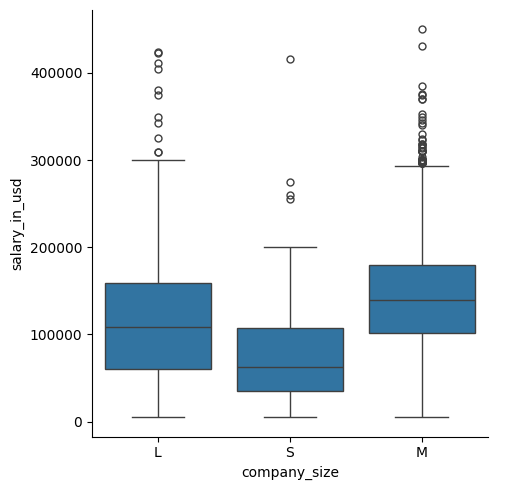

In [28]:
sns.catplot(data=df, x="company_size", y="salary_in_usd", kind="box")

cat = [col for col in df.columns if df[col].dtype=='object']
for col in cat:
  # print(f'A variável "{col}" possui {df[col].nunique()} valores únicos: {df[col].unique()}')
  print(f'A variável "{col}" possui {df[col].nunique()} valores únicos')

print()
ordered_job_title = dict(df.groupby('job_title')['salary_in_usd'].median().sort_values())
ordered_job_title = list(ordered_job_title.keys())
job_title_map = {ordered_job_title[i]: i+1 for i in range(len(ordered_job_title))}
print(job_title_map)



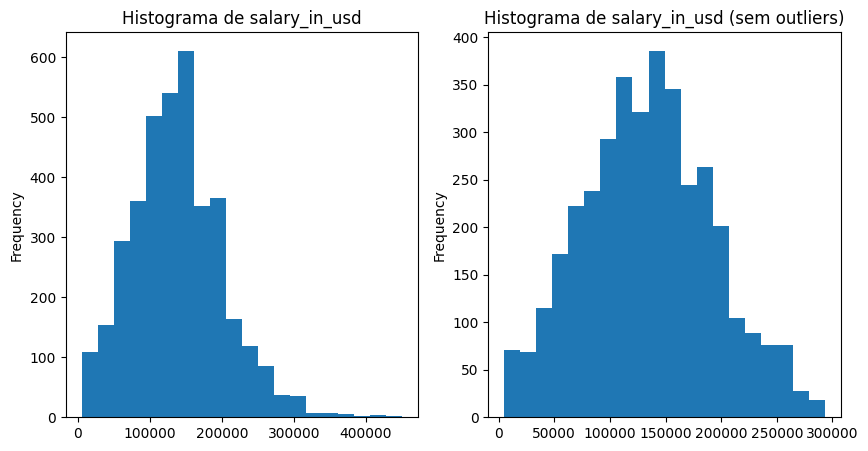

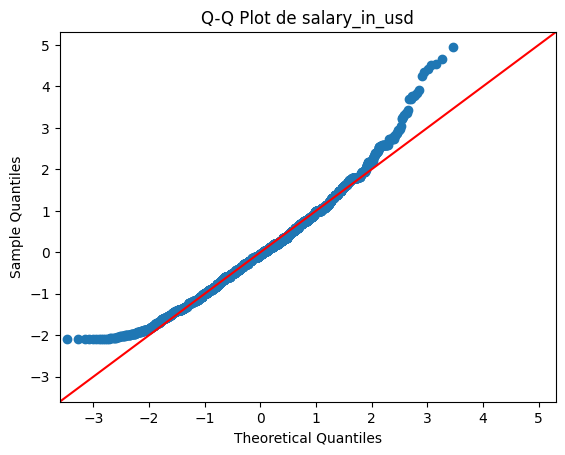

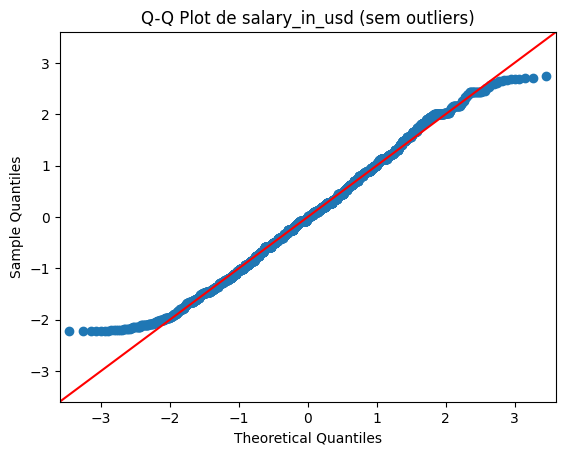

Para a distribuição de salários em USD
W=0.9827, p-valor=5.132455405327233e-21
Há evidências suficientes para rejeitar a hipótese de normalidade.
Para a distribuição de salários em USD (sem outliers)
W=0.9940, p-valor=2.7365635286993262e-11
Há evidências suficientes para rejeitar a hipótese de normalidade.


In [29]:
import statsmodels.api as sm
from scipy import stats

plt.figure(figsize=(10, 5))

plt.subplot(121)
df.salary_in_usd.plot.hist(bins=20)
plt.title('Histograma de salary_in_usd')

plt.subplot(122)
dfSemOutlier.salary_in_usd.plot.hist(bins=20)
plt.title('Histograma de salary_in_usd (sem outliers)')

sm.qqplot(df['salary_in_usd'], line='45', fit=True)
plt.title('Q-Q Plot de salary_in_usd')

sm.qqplot(dfSemOutlier['salary_in_usd'], line='45', fit=True)
plt.title('Q-Q Plot de salary_in_usd (sem outliers)')

plt.show()



# Teste de Shapiro-Wilk para checar normalidade

alpha = .05
shapiro_test = stats.shapiro(df['salary_in_usd'])

print("Para a distribuição de salários em USD")
if(shapiro_test.pvalue > alpha):
    print(f"W={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue}\nNão há evidências suficientes para rejeitar a hipótese de normalidade.")
else:
    print(f"W={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue}\nHá evidências suficientes para rejeitar a hipótese de normalidade.")


shapiro_test = stats.shapiro(dfSemOutlier['salary_in_usd'])

print("Para a distribuição de salários em USD (sem outliers)")
if(shapiro_test.pvalue > alpha):
    print(f"W={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue}\nNão há evidências suficientes para rejeitar a hipótese de normalidade.")
else:
    print(f"W={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue}\nHá evidências suficientes para rejeitar a hipótese de normalidade.")

# Portanto, não podemos utilizar ANOVA para a feature selection, já que esta assume premissa de normalidade.
# Buscar outros testes para a feature selection que não assumam premissa de normalidade.



Como não decidimos utilizar ANOVA, utilizaremos K-Fold-Target-Encoder para transformar nosso dados categóricos em valores numéricos, o que vai nos permitir encontrar a correlação das features em relação ao target utilizando Spearman o Pearson.

In [30]:
from sklearn.preprocessing import TargetEncoder

enconder = TargetEncoder(target_type='continuous', smooth=1,cv=1000, shuffle=True)


def roda_target(df):
  cat = [col for col in df.columns if df[col].dtype=='object']
  print(cat)

  for col in cat:
    x = df[[col]]
    y = df['salary_in_usd']
    x_trans = enconder.fit_transform(x,y)
    df[[col]] = x_trans

  return df

df = roda_target(df)
df.head(5)

dfSemOutlier = df.loc[df['salary_in_usd'] <= superior]

dfSemOutlier.head(5)



['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']


,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,153071.640037,138368.013480,204636.576546,62500.980314,85847,61110.546161,100,58348.235715,118414.903460
1,2023,104659.596843,124207.145641,161517.064696,149419.594284,30000,152877.114079,100,151836.410817,78953.630533
2,2023,104717.017459,124657.468222,161650.796478,149362.721007,25500,152832.909387,100,151838.815146,78984.370498
3,2023,153078.797042,138325.496361,140825.234197,149341.274745,175000,131782.809140,100,131487.532602,143152.455980
4,2023,153002.807982,138301.413495,140890.692218,149331.150977,120000,132429.860307,100,132119.371702,143102.728428


Agora, o primeiro passo para realizarmos feature selection é utilizarmos correlação de Pearson. Não utilizamos correlação de Spearman pois, como vimos anteriormente, os valores dos outliers não são discrepantes nesse dataset.
Abaixo, vemos um heatmap com as correlações entre todas as colunas. É importante perceber que, existem 3 colunas que possuem uma correlação muito alta entre si (para os padrões do dataset). Estas são company_location, employee_residence e salary_currency, o que pode indicar que devemos utilizar apenas uma delas, já que teríamos informação redundante caso contrário.

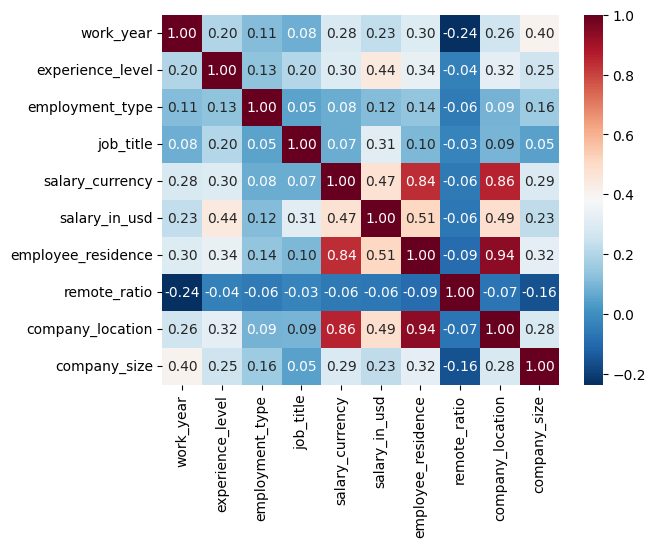

In [31]:
corr = df.corr(method='pearson')
sns.heatmap(corr,annot=True, cmap='RdBu_r', fmt='.2f')
plt.show()

Abaixo, vemos os índices de correlação em relação à variável dependente. Percebemos que há 5 features que apresentam um índice de correlação razoável.

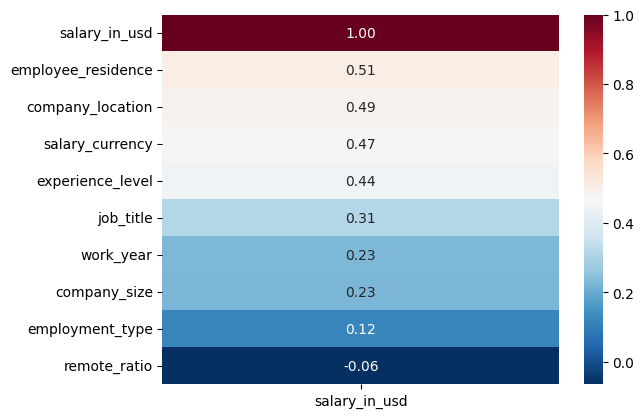

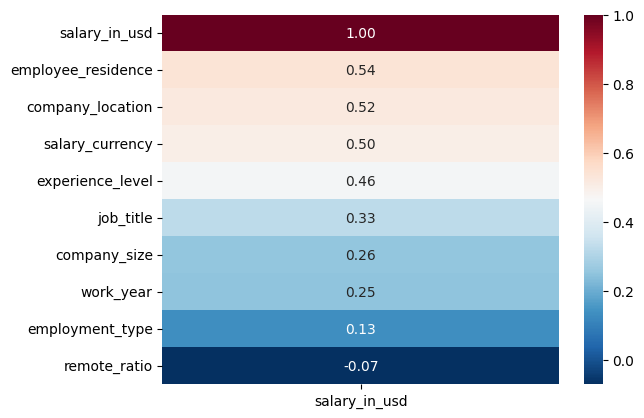

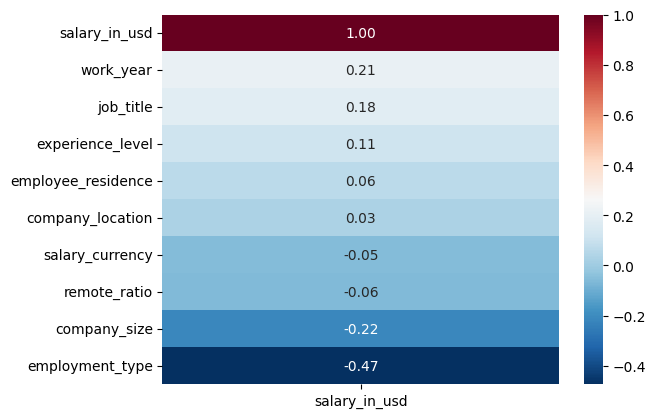

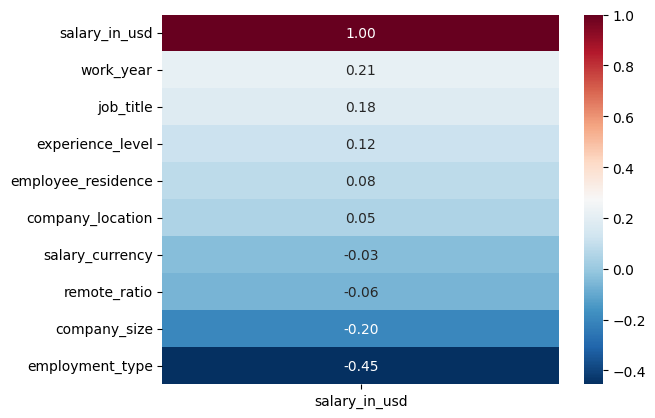

In [32]:
def plota_corr(metodo, df):
  corr = df.corr(method=metodo)
  salario_in_usd_corr = corr['salary_in_usd']
  sns.heatmap(salario_in_usd_corr.sort_values(ascending=False).to_frame(),annot=True, cmap='RdBu_r', fmt='.2f')
  plt.show()

plota_corr('pearson', df)
plota_corr('pearson', dfSemOutlier)
plota_corr('spearman', df)
plota_corr('spearman', dfSemOutlier)

Dessa forma, selecionaremos apenas 1 feature dentre as 3 que possuem índice de correlação alto entre si. Dentre essas 3, selecionamos employee residence, já que possui a maior correlação com a feature principal. Além disso, selecionamos as features experience_level e job_title, ambas com índice maior que 0.3.

In [33]:

dfSelecionado = df[['employee_residence','experience_level' ,'job_title','company_size', 'salary_in_usd']]
dfSelecionado.head(5)

,employee_residence,experience_level,job_title,company_size,salary_in_usd
0,61110.546161,153071.640037,204636.576546,118414.903460,85847
1,152877.114079,104659.596843,161517.064696,78953.630533,30000
2,152832.909387,104717.017459,161650.796478,78984.370498,25500
3,131782.809140,153078.797042,140825.234197,143152.455980,175000
4,132429.860307,153002.807982,140890.692218,143102.728428,120000


Normalizando os dados, temos:

In [34]:
# Supondo que df já está carregado


scaler = MinMaxScaler()

# dfNormalizado = df[['employee_residence','experience_level' ,'job_title','company_size']]

dfSelecionado = pd.DataFrame(scaler.fit_transform(dfSelecionado), columns=dfSelecionado.columns)
# dfSelecionado = pd.concat([dfNormalizado, df[['salary_in_usd']]], axis=1)

dfSelecionado.head(5)

,employee_residence,experience_level,job_title,company_size,salary_in_usd
0,0.204996,0.636048,0.707642,0.628773,0.181436
1,0.897103,0.225664,0.518565,0.038990,0.055900
2,0.896770,0.226151,0.519151,0.039450,0.045784
3,0.738009,0.636109,0.427832,0.998498,0.381839
4,0.742889,0.635464,0.428119,0.997755,0.258207


Dado que terminamos nossa seleção de features, podemos começar a realizar o treinamento do nosso modelo.

In [35]:
X = dfSelecionado.drop('salary_in_usd', axis=1)
y = dfSelecionado['salary_in_usd']

# Model
reg = LinearRegression()

# K-Fold config
kf = KFold(n_splits=100, shuffle=True, random_state=42)

# R² scores
r2_scores = cross_val_score(reg, X, y, cv=kf, scoring='r2')

# MSE scores (need custom scorer)
mse_scores = cross_val_score(
    reg,
    X,
    y,
    cv=kf,
    scoring=make_scorer(mean_squared_error)
)

# print("R² scores:", r2_scores)
print("R² médio:", np.mean(r2_scores))

# print("\nMSE scores:", mse_scores)
print("MSE médio:", np.mean(mse_scores))

R² médio: 0.37316932650983353
MSE médio: 0.01231351750370069


### Modelo de Redes Neurais

In [46]:
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Configura o k-fold
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Armazenar as métricas de erro (quadrático e absoluto)
mse_scores = []
mae_scores = []
r2_scores = []

# Criar a arquitetura da rede neural
def create_model():
    model = Sequential([
        Dense(4*X.shape[1], activation='relu', input_shape=(X.shape[1],)),
        Dense(2*X.shape[1], activation='relu'),
        Dense(1) # Camada de saída para regressão
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

n_epochs=100

# Itera sobre os folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Criar e treinar o modelo
    model = create_model()
    model.fit(X_train, y_train, epochs=n_epochs, verbose=0) # verbose=0 para não exibir o progresso

    # Avaliar o modelo
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Calcular e exibe o desempenho médio
print(f"Resultados do EQM por fold: {mse_scores}")
print(f"EQM médio: {np.mean(mse_scores)}")
print(f"Desvio padrão do EQM: {np.std(mse_scores)}")

print(f"EAM médio: {np.mean(mae_scores)}")
print(f"Desvio padrão do EAM: {np.std(mae_scores)}")

print(f"R^2 score médio: {np.mean(r2_scores)}")
print(f"Desvio padrão do R^2 score: {np.std(r2_scores)}")


# Hiperparâmetros ajustáveis: Número de camadas, neurônios, épocas, e quantidade de folds no k-fold

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Resultados do EQM por fold: [0.013062711945583555, 0.010411957073599175, 0.01301526985022291, 0.014634964763431303, 0.011551998199430005, 0.014515465442890283, 0.011162106541968728, 0.012988660373601036, 0.00950625374796171, 0.010582834043942238]
EQM médio: 0.012143222198263094
Desvio padrão do EQM: 0.0016689769235527085
EAM médio: 0.0819539924846943
Desvio padrão do EAM: 0.003809602503416078
R^2 score médio: 0.3949995281056643
Desvio padrão do R^2 score: 0.061795693899981595


### Modelo de SVM

In [ ]:
# Sylvio starts here...